In [22]:
import pandas as pd
from Bio import SeqIO
import seaborn as sns
from codon_counter import *
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [90]:
df = pd.read_excel("Shigella_mutants-proteomics_results-run2.xlsx")
df.head()


,protein_id,gene_name,description,comparison,log2_fc,p_value,adj_p_value,significant
0,QCC34454.1,icsP,omptin family outer membrane protease IcsP,mnmE-WT,-1.340949,9.049053e-11,1.948261e-07,True
1,QCC32881.1,panB,3-methyl-2-oxobutanoate hydroxymethyltransferase,mnmE-WT,-1.309781,3.029777e-10,2.605178e-07,True
2,QCC34427.1,EKN05_024790,invasin IpaA,mnmE-WT,-1.508884,4.387052e-10,2.605178e-07,True
3,QCC31329.1,yedE,selenium metabolism membrane protein YedE/FdhT,mnmE-WT,1.862296,4.840089e-10,2.605178e-07,True
4,QCC33432.1,pyrE,orotate phosphoribosyltransferase,mnmE-WT,-1.332021,1.547091e-09,6.661772e-07,True


In [91]:
chromosome =  next(SeqIO.parse("CP037923.1.txt", "embl"))
plasmid = next(SeqIO.parse("CP037924.1.txt", "embl"))

r_counts_chromosome = make_aa_dict(chromosome, 'AGA')
r_counts_plasmid = make_aa_dict(plasmid, 'AGA')

r_counts = dict(r_counts_chromosome,**r_counts_plasmid)
aga_counts = make_codon_dict(chromosome, 'AGA')
aga_counts.update(make_codon_dict(plasmid, 'AGA'))
agg_counts = make_codon_dict(chromosome, 'AGG')
agg_counts.update(make_codon_dict(plasmid, 'AGG'))

l_counts = make_aa_dict(chromosome, 'UUA')
l_counts.update(make_aa_dict(plasmid, 'UUA'))
uua_counts = make_codon_dict(chromosome, 'UUA')
uua_counts.update(make_codon_dict(plasmid, 'UUA'))

v_counts = make_aa_dict(chromosome, 'GUA')
v_counts.update(make_aa_dict(plasmid, 'GUA'))
gua_counts = make_codon_dict(chromosome, 'GUA')
gua_counts.update(make_codon_dict(plasmid, 'GUA'))
gug_counts = make_codon_dict(chromosome, 'GUG')
gug_counts.update(make_codon_dict(plasmid, 'GUG'))

g_counts = make_aa_dict(chromosome, 'GGA')
g_counts.update(make_aa_dict(plasmid, 'GGA'))
gga_counts = make_codon_dict(chromosome, 'GGA')
gga_counts.update(make_codon_dict(plasmid, 'GGA'))
ggg_counts = make_codon_dict(chromosome, 'GGG')
ggg_counts.update(make_codon_dict(plasmid, 'GGG'))

q_counts = make_aa_dict(chromosome, 'CAA')
q_counts.update(make_aa_dict(plasmid, 'CAA'))
caa_counts = make_codon_dict(chromosome, 'CAA')
caa_counts.update(make_codon_dict(plasmid, 'CAA'))
cag_counts = make_codon_dict(chromosome, 'CAG')
cag_counts.update(make_codon_dict(plasmid, 'CAG'))

k_counts = make_aa_dict(chromosome, 'AAA')
k_counts.update(make_aa_dict(plasmid, 'AAA'))
aaa_counts = make_codon_dict(chromosome, 'AAA')
aaa_counts.update(make_codon_dict(plasmid, 'AAA'))
aag_counts = make_codon_dict(chromosome, 'AAG')
aag_counts.update(make_codon_dict(plasmid, 'AAG'))

e_counts = make_aa_dict(chromosome, 'GAA')
e_counts.update(make_aa_dict(plasmid, 'GAA'))
gaa_counts = make_codon_dict(chromosome, 'GAA')
gaa_counts.update(make_codon_dict(plasmid, 'GAA'))
gag_counts = make_codon_dict(chromosome, 'GAG')
gag_counts.update(make_codon_dict(plasmid, 'GAG'))

In [92]:
df['significant'] = (df.loc[:, 'adj_p_value'] < 0.01) & ((df.loc[:, 'log2_fc'] > 0.5) | (df.loc[:, 'log2_fc'] < 0.5))
df['R_count'] = df['protein_id'].map(r_counts)
df['L_count'] = df['protein_id'].map(l_counts)
df['V_count'] = df['protein_id'].map(v_counts)
df['G_count'] = df['protein_id'].map(g_counts)
df['Q_count'] = df['protein_id'].map(q_counts)
df['K_count'] = df['protein_id'].map(k_counts)
df['E_count'] = df['protein_id'].map(e_counts)


df['AGA_count'] = df['protein_id'].map(aga_counts)
df['AGA_fraction'] = df['AGA_count']/df['R_count']
df['AGG_count'] = df['protein_id'].map(agg_counts)
df['AGG_fraction'] = df['AGG_count']/df['R_count']

df['UUA_count'] = df['protein_id'].map(uua_counts)
df['UUA_fraction'] = df['UUA_count']/df['L_count']

df['GUA_count'] = df['protein_id'].map(gua_counts)
df['GUA_fraction'] = df['GUA_count']/df['V_count']
df['GUG_count'] = df['protein_id'].map(gug_counts)
df['GUG_fraction'] = df['GUG_count']/df['V_count']

df['GGA_count'] = df['protein_id'].map(gga_counts)
df['GGA_fraction'] = df['GGA_count']/df['G_count']
df['GGG_count'] = df['protein_id'].map(ggg_counts)
df['GGG_fraction'] = df['GGG_count']/df['G_count']

df['CAA_count'] = df['protein_id'].map(caa_counts)
df['CAA_fraction'] = df['CAA_count']/df['Q_count']
df['CAG_count'] = df['protein_id'].map(cag_counts)
df['CAG_fraction'] = df['CAG_count']/df['Q_count']

df['AAA_count'] = df['protein_id'].map(aaa_counts)
df['AAA_fraction'] = df['AAA_count']/df['K_count']
df['AAG_count'] = df['protein_id'].map(aag_counts)
df['AAG_fraction'] = df['AAG_count']/df['K_count']

df['GAA_count'] = df['protein_id'].map(gaa_counts)
df['GAA_fraction'] = df['GAA_count']/df['E_count']
df['GAG_count'] = df['protein_id'].map(gag_counts)
df['GAG_fraction'] = df['GAG_count']/df['E_count']

df = df.fillna(0)
df

,protein_id,gene_name,description,comparison,log2_fc,p_value,adj_p_value,significant,R_count,L_count,...,CAG_count,CAG_fraction,AAA_count,AAA_fraction,AAG_count,AAG_fraction,GAA_count,GAA_fraction,GAG_count,GAG_fraction
0,QCC34454.1,icsP,omptin family outer membrane protease IcsP,mnmE-WT,-1.340949,9.049053e-11,1.948261e-07,True,10,23,...,5,0.555556,22,0.880000,3,0.120000,9,0.600000,6,0.400000
1,QCC32881.1,panB,3-methyl-2-oxobutanoate hydroxymethyltransferase,mnmE-WT,-1.309781,3.029777e-10,2.605178e-07,True,10,25,...,7,0.777778,10,0.833333,2,0.166667,13,0.764706,4,0.235294
2,QCC34427.1,EKN05_024790,invasin IpaA,mnmE-WT,-1.508884,4.387052e-10,2.605178e-07,True,21,65,...,9,0.333333,38,0.760000,12,0.240000,28,0.800000,7,0.200000
3,QCC31329.1,yedE,selenium metabolism membrane protein YedE/FdhT,mnmE-WT,1.862296,4.840089e-10,2.605178e-07,True,20,42,...,10,0.714286,13,0.928571,1,0.071429,8,0.727273,3,0.272727
4,QCC33432.1,pyrE,orotate phosphoribosyltransferase,mnmE-WT,-1.332021,1.547091e-09,6.661772e-07,True,12,23,...,6,0.857143,9,0.692308,4,0.307692,9,0.500000,9,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,QCC32977.1,rpsT,30S ribosomal protein S20,yejB-WT,0.000099,9.982538e-01,9.988563e-01,False,7,3,...,4,0.800000,8,0.571429,6,0.428571,3,1.000000,0,0.000000
10761,QCC32417.1,nagD,ribonucleotide monophosphatase NagD,yejB-WT,-0.000070,9.983597e-01,9.988563e-01,False,10,18,...,4,0.800000,8,0.800000,2,0.200000,8,0.800000,2,0.200000
10762,QCC33446.1,EKN05_019550,AsmA family protein,yejB-WT,-0.000061,9.983744e-01,9.988563e-01,False,29,70,...,17,0.531250,13,0.764706,4,0.235294,19,0.826087,4,0.173913
10763,QCC33749.1,arsR,arsenical resistance operon transcriptionalreg...,yejB-WT,0.000057,9.988470e-01,9.988563e-01,False,8,20,...,4,0.571429,2,0.285714,5,0.714286,6,0.857143,1,0.142857


In [74]:
print(df.comparison.unique())

mnmE_df = df.loc[df['comparison'] == 'mnmE-WT']
mnmG_df = df.loc[df['comparison'] == 'mnmG-WT']

#print(len(mnmE_df.protein_id.unique()), len(mnmE_df.comparison))
#df2[df2.protein_id.duplicated(keep=False)]

['mnmE-WT' 'mnmG-WT' 'pcnB-WT' 'virF-WT' 'yejB-WT']


<Axes: xlabel='log2_fc', ylabel='R_count'>

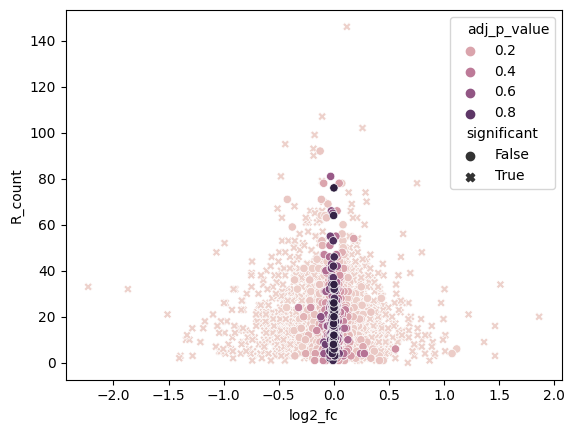

In [87]:
sns.scatterplot(data = df.loc[df['comparison'] == 'mnmE-WT'],x="log2_fc",y="R_count", hue="adj_p_value", style='significant')
#plt.yscale('log', base=10)



In [68]:

df

,protein_id,gene_name,description,comparison,log2_fc,p_value,adj_p_value,significant,R_count,AGA_count,AGA_fraction
0,QCC34454.1,icsP,omptin family outer membrane protease IcsP,mnmE-WT,-1.340949,9.049053e-11,1.948261e-07,True,10,4,0.400000
1,QCC32881.1,panB,3-methyl-2-oxobutanoate hydroxymethyltransferase,mnmE-WT,-1.309781,3.029777e-10,2.605178e-07,True,10,0,0.000000
2,QCC34427.1,EKN05_024790,invasin IpaA,mnmE-WT,-1.508884,4.387052e-10,2.605178e-07,True,21,13,0.619048
3,QCC31329.1,yedE,selenium metabolism membrane protein YedE/FdhT,mnmE-WT,1.862296,4.840089e-10,2.605178e-07,True,20,0,0.000000
4,QCC33432.1,pyrE,orotate phosphoribosyltransferase,mnmE-WT,-1.332021,1.547091e-09,6.661772e-07,True,12,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10760,QCC32977.1,rpsT,30S ribosomal protein S20,yejB-WT,0.000099,9.982538e-01,9.988563e-01,False,7,0,0.000000
10761,QCC32417.1,nagD,ribonucleotide monophosphatase NagD,yejB-WT,-0.000070,9.983597e-01,9.988563e-01,False,10,0,0.000000
10762,QCC33446.1,EKN05_019550,AsmA family protein,yejB-WT,-0.000061,9.983744e-01,9.988563e-01,False,29,2,0.068966
10763,QCC33749.1,arsR,arsenical resistance operon transcriptionalreg...,yejB-WT,0.000057,9.988470e-01,9.988563e-01,False,8,1,0.125000
